In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("OPD_Prediction_Complete_Dataset.csv")

# Display the first few rows to understand the structure
print(data.head())

# Display dataset information
print(data.info())

# Statistical summary of numerical columns
print(data.describe())


  Patient_ID  Patient_Age Patient_Gender      Patient_Location  \
0      P0001           57         Female  26.263401, 75.837079   
1      P0002           69          Other  26.866894, 75.474824   
2      P0003           28           Male  26.126186, 75.423375   
3      P0004           67         Female  26.112519, 75.149642   
4      P0005           88          Other  26.401720, 75.395793   

  Appointment_Date Appointment_Time Check_In_Time Check_Out_Time  \
0       2024-12-06            19:41         19:14          20:08   
1       2024-12-23            17:51         17:28          18:30   
2       2025-01-27            17:24         16:56          18:00   
3       2025-01-05            15:14         14:47          15:39   
4       2024-12-17            14:58         14:28          15:28   

  Consultation_Type Weather_Condition  ... Current_OPD_Load OPD_Capacity  \
0           Routine             Rainy  ...               29           30   
1         Emergency             Rainy  ...

In [3]:
print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Patient_ID                          0
Patient_Age                         0
Patient_Gender                      0
Patient_Location                    0
Appointment_Date                    0
Appointment_Time                    0
Check_In_Time                       0
Check_Out_Time                      0
Consultation_Type                   0
Weather_Condition                   0
Traffic_Condition                   0
Public_Holiday                      0
Local_Event                         0
Distance_to_Hospital_km             0
Travel_Time_min                     0
Current_OPD_Load                    0
OPD_Capacity                        0
Doctor_ID                           0
Doctor_Specialization               0
Doctor_Availability                 0
Emergency_Cases_Handled             0
Avg_Doctor_Consultation_Time_min    0
Avg_Patient_Waiting_Time_min        0
Waiting_Time_min                    0
Optimal_Leave_Time_min              0
dtype: int64


In [4]:
# One-hot encoding for Weather_Condition and Day_Of_Week
data = pd.get_dummies(data, columns=['Weather_Condition'], drop_first=True)

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for traffic condition
traffic_order = ['Low', 'Moderate', 'High']
ordinal_encoder = OrdinalEncoder(categories=[traffic_order])

# Apply ordinal encoding to Traffic_Condition
data['Traffic_Condition'] = ordinal_encoder.fit_transform(data[['Traffic_Condition']])


In [6]:
# Example: Map binary categories to 0 and 1
binary_columns = ['Public_Holiday', 'Local_Event', 'Doctor_Availability']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})


In [7]:
# Encoding Patient_Gender
data['Patient_Gender'] = data['Patient_Gender'].map({'Male': 0, 'Female': 1})

# Encoding Consultation_Type and Doctor_Specialization
data = pd.get_dummies(data, columns=['Consultation_Type', 'Doctor_Specialization'], drop_first=True)


In [8]:
# Display the updated dataset structure
print(data.head())

  Patient_ID  Patient_Age  Patient_Gender      Patient_Location  \
0      P0001           57             1.0  26.263401, 75.837079   
1      P0002           69             NaN  26.866894, 75.474824   
2      P0003           28             0.0  26.126186, 75.423375   
3      P0004           67             1.0  26.112519, 75.149642   
4      P0005           88             NaN  26.401720, 75.395793   

  Appointment_Date Appointment_Time Check_In_Time Check_Out_Time  \
0       2024-12-06            19:41         19:14          20:08   
1       2024-12-23            17:51         17:28          18:30   
2       2025-01-27            17:24         16:56          18:00   
3       2025-01-05            15:14         14:47          15:39   
4       2024-12-17            14:58         14:28          15:28   

   Traffic_Condition  Public_Holiday  ...  Waiting_Time_min  \
0                1.0               0  ...                26   
1                2.0               1  ...                 0   

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Patient_ID                               1000 non-null   object 
 1   Patient_Age                              1000 non-null   int64  
 2   Patient_Gender                           679 non-null    float64
 3   Patient_Location                         1000 non-null   object 
 4   Appointment_Date                         1000 non-null   object 
 5   Appointment_Time                         1000 non-null   object 
 6   Check_In_Time                            1000 non-null   object 
 7   Check_Out_Time                           1000 non-null   object 
 8   Traffic_Condition                        1000 non-null   float64
 9   Public_Holiday                           1000 non-null   int64  
 10  Local_Event                              1000 non

In [14]:
# Update the column without using inplace
data['Patient_Gender'] = data['Patient_Gender'].fillna(data['Patient_Gender'].mode()[0])


In [15]:
# Convert date and time columns to datetime format
data['Appointment_Date'] = pd.to_datetime(data['Appointment_Date'])
data['Appointment_Time'] = pd.to_datetime(data['Appointment_Time'])
data['Check_In_Time'] = pd.to_datetime(data['Check_In_Time'])
data['Check_Out_Time'] = pd.to_datetime(data['Check_Out_Time'])


In [16]:
# Convert boolean columns (weather conditions, consultation types, doctor specialization)
bool_columns = [
    'Weather_Condition_Humid', 'Weather_Condition_Rainy', 'Weather_Condition_Sunny',
    'Consultation_Type_Follow-up', 'Consultation_Type_Routine',
    'Doctor_Specialization_General Physician', 'Doctor_Specialization_Orthopedic',
    'Doctor_Specialization_Pediatrician'
]

data[bool_columns] = data[bool_columns].astype(int)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Patient_Location'] = label_encoder.fit_transform(data['Patient_Location'])
data['Patient_Gender'] = label_encoder.fit_transform(data['Patient_Gender'])
data['Doctor_ID'] = label_encoder.fit_transform(data['Doctor_ID'])


In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns that need scaling
numerical_columns = [
    'Patient_Age', 'Distance_to_Hospital_km', 'Travel_Time_min', 'Current_OPD_Load', 
    'OPD_Capacity', 'Avg_Doctor_Consultation_Time_min', 'Emergency_Cases_Handled',
    'Avg_Patient_Waiting_Time_min', 'Waiting_Time_min', 'Optimal_Leave_Time_min'
]

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


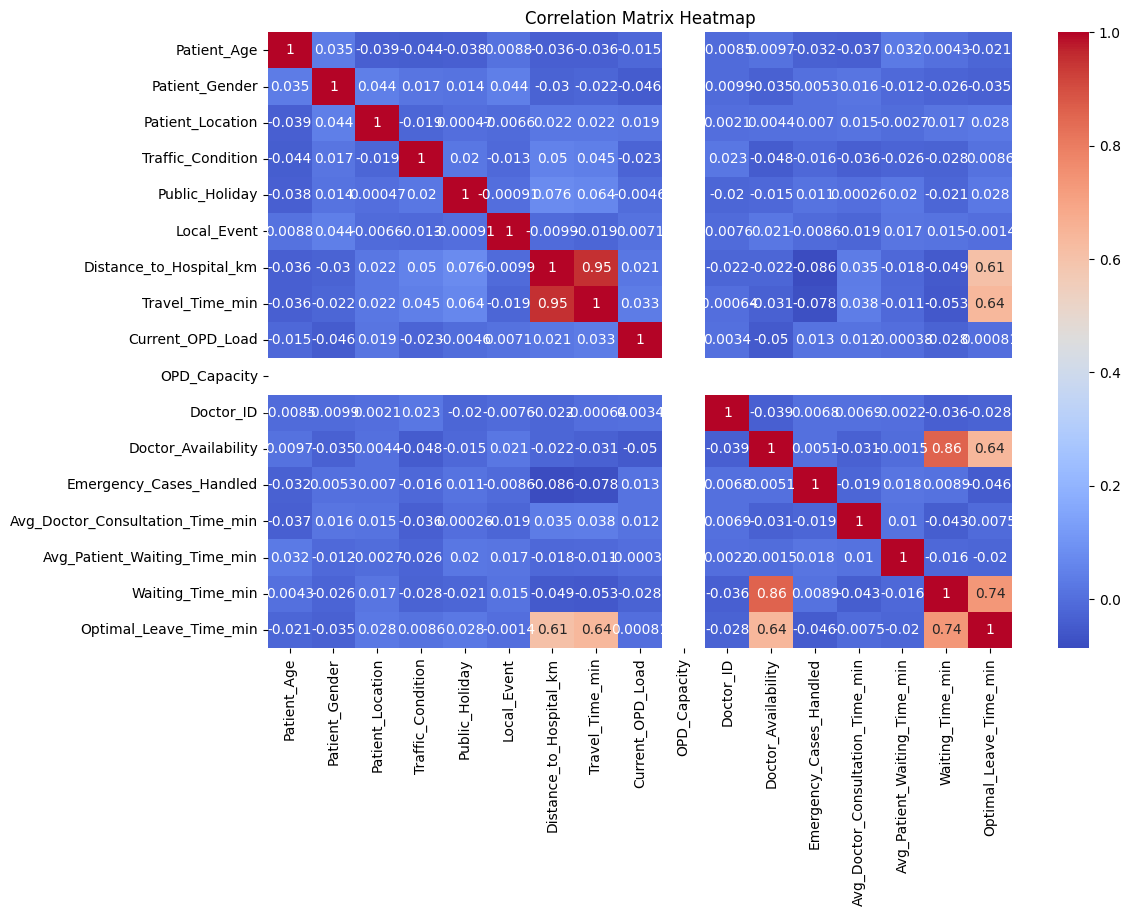

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [20]:
# Set the correlation threshold
correlation_threshold = 0.5

# Identify features highly correlated with the target variable
target_variable = 'Optimal_Leave_Time_min'
correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold].index.tolist()

print("Highly correlated features with the target variable:")
print(correlated_features)

# Exclude the target variable itself from the list
correlated_features.remove(target_variable)


Highly correlated features with the target variable:
['Distance_to_Hospital_km', 'Travel_Time_min', 'Doctor_Availability', 'Waiting_Time_min', 'Optimal_Leave_Time_min']


In [21]:
# Select only the highly correlated features and the target variable
selected_features = correlated_features + [target_variable]
selected_data = data[selected_features]

# Handle missing values (fill with mean for simplicity)
selected_data = selected_data.fillna(selected_data.mean())

# If categorical data is present, encode it (example for binary encoding)
if 'Patient_Gender' in selected_data.columns:
    selected_data['Patient_Gender'] = selected_data['Patient_Gender'].map({'Male': 0, 'Female': 1})


In [22]:
# Example: Calculate the total time of an appointment if relevant columns exist
if {'Check_In_Time', 'Check_Out_Time'}.issubset(data.columns):
    data['Appointment_Duration_min'] = (
        pd.to_datetime(data['Check_Out_Time']) - pd.to_datetime(data['Check_In_Time'])
    ).dt.total_seconds() / 60.0

# Example: Extract day of the week if 'Appointment_Date' is present
if 'Appointment_Date' in data.columns:
    data['Day_of_Week'] = pd.to_datetime(data['Appointment_Date']).dt.dayofweek


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Patient_ID                               1000 non-null   object        
 1   Patient_Age                              1000 non-null   float64       
 2   Patient_Gender                           1000 non-null   int64         
 3   Patient_Location                         1000 non-null   int64         
 4   Appointment_Date                         1000 non-null   datetime64[ns]
 5   Appointment_Time                         1000 non-null   datetime64[ns]
 6   Check_In_Time                            1000 non-null   datetime64[ns]
 7   Check_Out_Time                           1000 non-null   datetime64[ns]
 8   Traffic_Condition                        1000 non-null   float64       
 9   Public_Holiday                           1

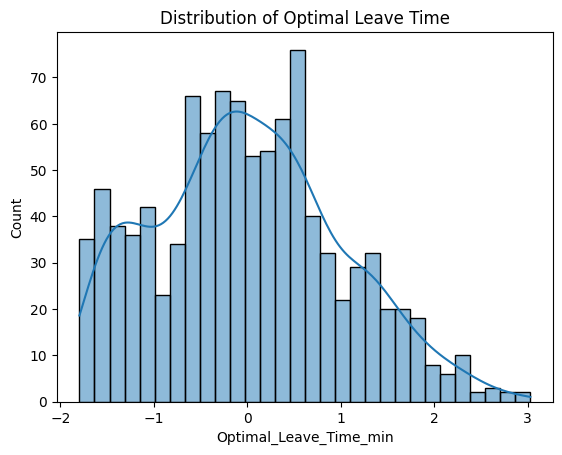

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the target variable
sns.histplot(data['Optimal_Leave_Time_min'], kde=True, bins=30)
plt.title('Distribution of Optimal Leave Time')
plt.show()


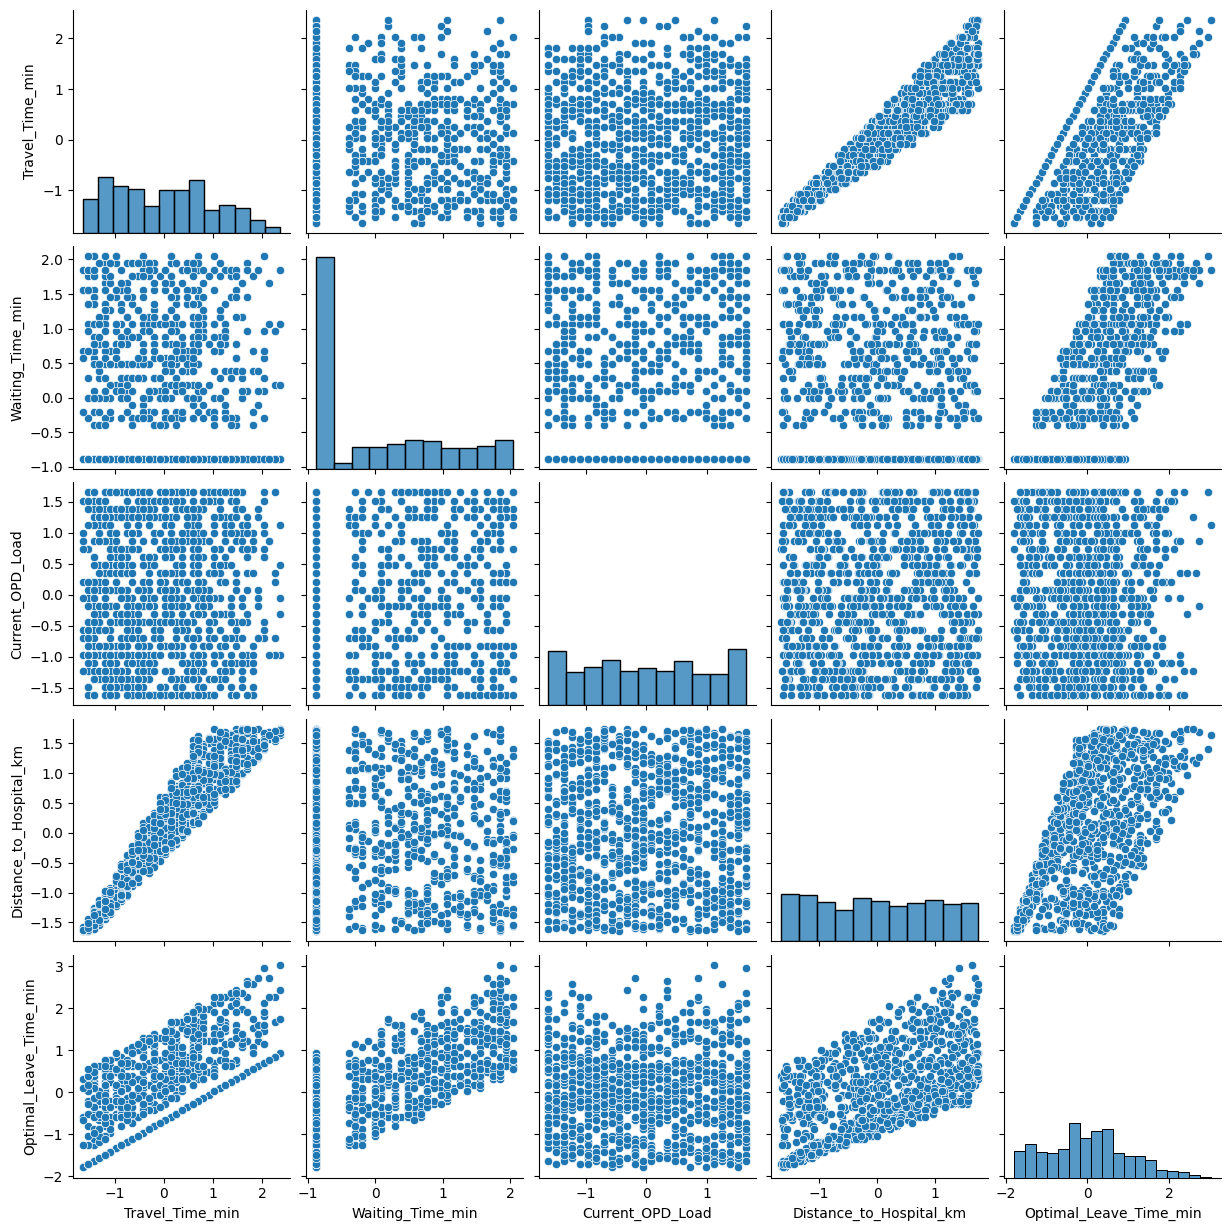

In [25]:
# Plot relationships between key features and target variable
sns.pairplot(data[['Travel_Time_min', 'Waiting_Time_min', 'Current_OPD_Load', 'Distance_to_Hospital_km', 'Optimal_Leave_Time_min']])
plt.show()


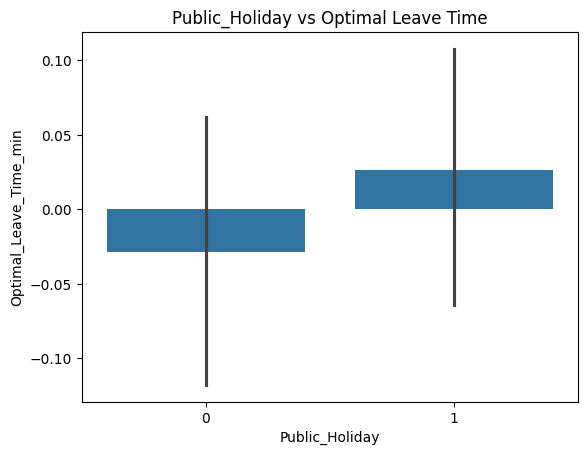

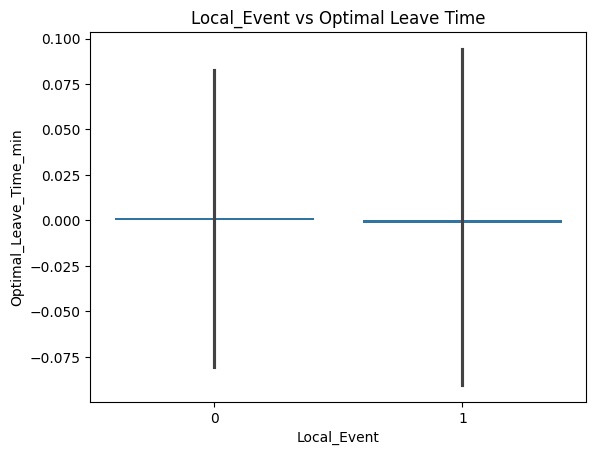

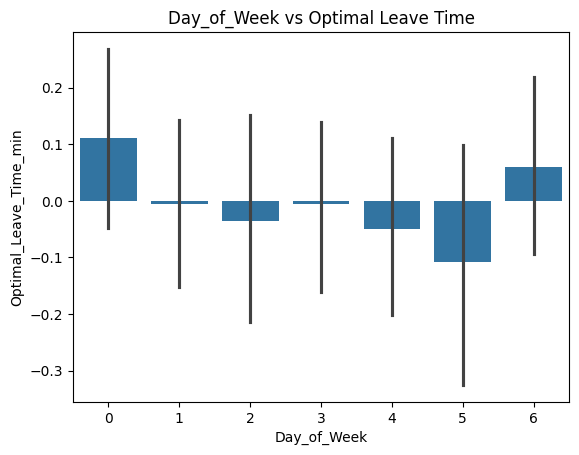

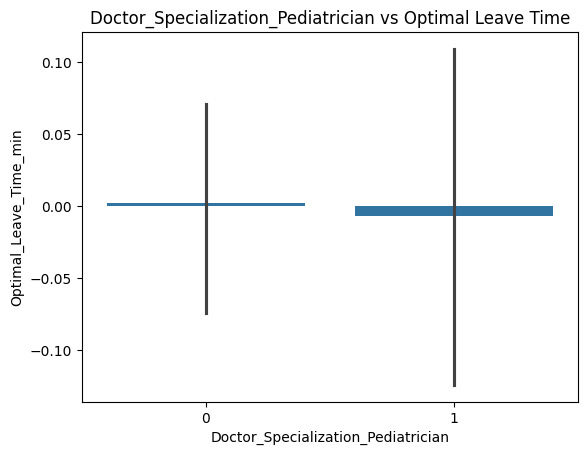

In [26]:
# Bar plots for categorical features
categorical_columns = ['Public_Holiday', 'Local_Event', 'Day_of_Week', 'Doctor_Specialization_Pediatrician']
for col in categorical_columns:
    sns.barplot(x=col, y='Optimal_Leave_Time_min', data=data)
    plt.title(f'{col} vs Optimal Leave Time')
    plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Optimal_Leave_Time_min', 'Patient_ID', 'Appointment_Date', 'Appointment_Time', 'Check_In_Time', 'Check_Out_Time'])
y = data['Optimal_Leave_Time_min']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")


Training and testing sets created.


In [28]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


RMSE: 0.065952528000637
R^2 Score: 0.9958344272406541


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


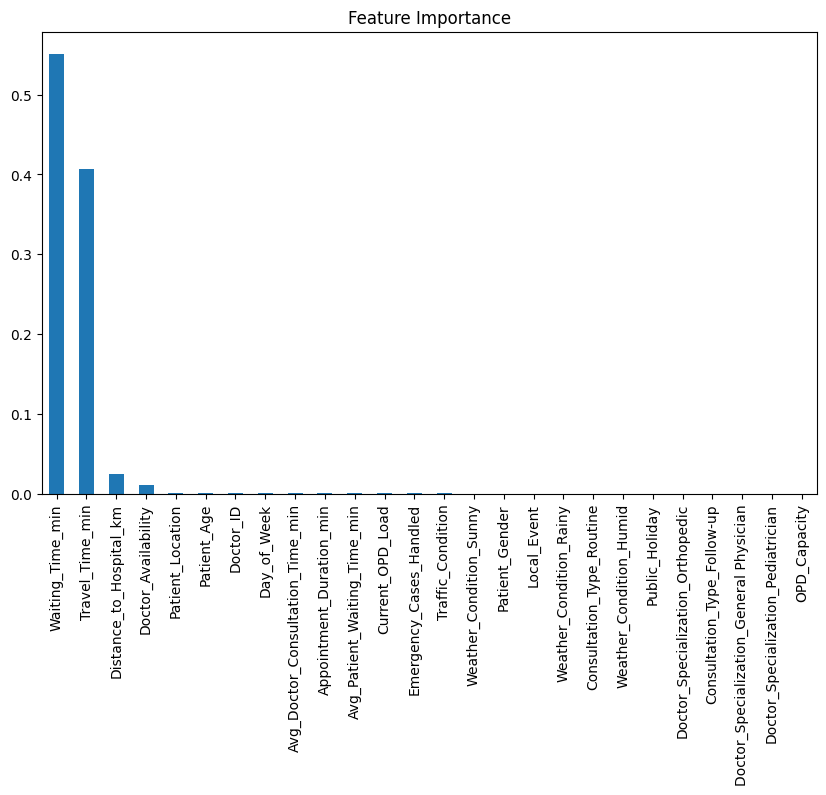

In [30]:
import pandas as pd

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_) ** 0.5)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_e

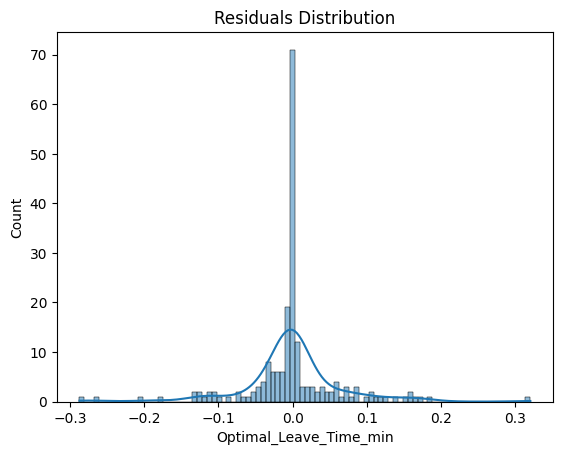

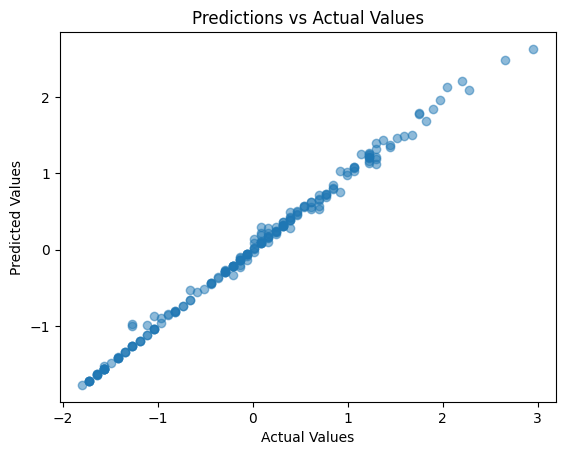

In [32]:
import numpy as np

# Plot residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()


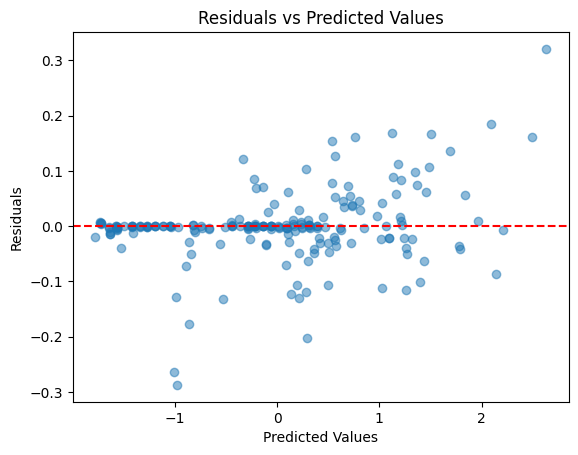

In [33]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [34]:
outliers = data.iloc[(residuals.abs().sort_values(ascending=False).index)[:10]]
print(outliers)


    Patient_ID  Patient_Age  Patient_Gender  Patient_Location  \
499      P0500    -0.136167               0               364   
445      P0446     0.353642               0               132   
174      P0175     0.089899               1               804   
985      P0986    -0.211522               0               655   
590      P0591    -1.191140               1               374   
584      P0585     0.428997               1               869   
294      P0295    -1.228817               0                82   
158      P0159     1.182549               0                88   
363      P0364    -0.739008               1               640   
208      P0209    -1.492560               0               347   

    Appointment_Date    Appointment_Time       Check_In_Time  \
499       2025-01-17 2025-01-02 12:45:00 2025-01-02 12:24:00   
445       2025-01-02 2025-01-02 08:49:00 2025-01-02 08:20:00   
174       2024-12-17 2025-01-02 17:00:00 2025-01-02 16:32:00   
985       2025-01-18 2025-01

In [35]:
from sklearn.metrics import mean_absolute_error

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 0.065952528000637
MAE: 0.03624330810530237
R² Score: 0.9958344272406541


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Cross-validated RMSE:", (-scores.mean()) ** 0.5)


Cross-validated RMSE: 0.07163714955304816


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_) ** 0.5)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_e

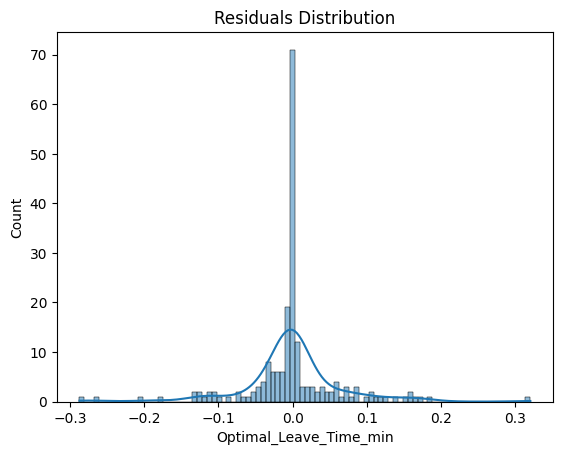

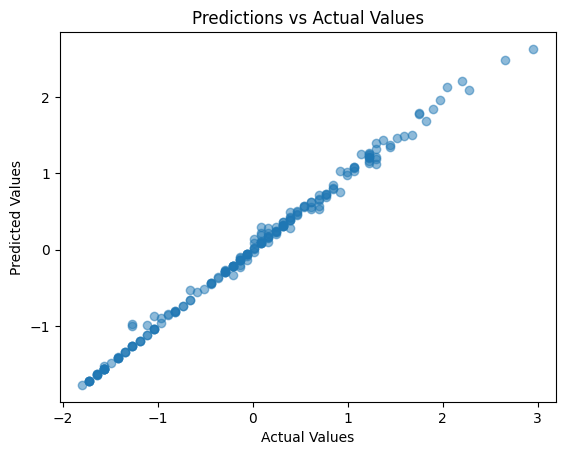

In [38]:
import numpy as np

# Plot residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = model.predict(X_test)
print("Test RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))


Test RMSE: 0.065952528000637
Test MAE: 0.03624330810530237
Test R² Score: 0.9958344272406541


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
import joblib

# Save the model
joblib.dump(model, 'optimal_leave_time_model.pkl')

# To load the model later
loaded_model = joblib.load('optimal_leave_time_model.pkl')


In [41]:
data.head()

,Patient_ID,Patient_Age,Patient_Gender,Patient_Location,Appointment_Date,Appointment_Time,Check_In_Time,Check_Out_Time,Traffic_Condition,Public_Holiday,...,Weather_Condition_Humid,Weather_Condition_Rainy,Weather_Condition_Sunny,Consultation_Type_Follow-up,Consultation_Type_Routine,Doctor_Specialization_General Physician,Doctor_Specialization_Orthopedic,Doctor_Specialization_Pediatrician,Appointment_Duration_min,Day_of_Week
0,P0001,0.466675,1,271,2024-12-06,2025-01-02 19:41:00,2025-01-02 19:14:00,2025-01-02 20:08:00,1.0,0,...,0,1,0,0,1,1,0,0,54.0,4
1,P0002,0.918806,0,860,2024-12-23,2025-01-02 17:51:00,2025-01-02 17:28:00,2025-01-02 18:30:00,2.0,1,...,0,1,0,0,0,0,1,0,62.0,0
2,P0003,-0.625976,0,128,2025-01-27,2025-01-02 17:24:00,2025-01-02 16:56:00,2025-01-02 18:00:00,0.0,0,...,0,1,0,0,1,0,0,1,64.0,0
3,P0004,0.843451,1,116,2025-01-05,2025-01-02 15:14:00,2025-01-02 14:47:00,2025-01-02 15:39:00,2.0,0,...,0,0,0,1,0,1,0,0,52.0,6
4,P0005,1.634680,0,400,2024-12-17,2025-01-02 14:58:00,2025-01-02 14:28:00,2025-01-02 15:28:00,0.0,1,...,1,0,0,0,1,0,0,1,60.0,1


In [42]:
feature_names = loaded_model.feature_names_in_
print(feature_names)


['Patient_Age' 'Patient_Gender' 'Patient_Location' 'Traffic_Condition'
 'Public_Holiday' 'Local_Event' 'Distance_to_Hospital_km'
 'Travel_Time_min' 'Current_OPD_Load' 'OPD_Capacity' 'Doctor_ID'
 'Doctor_Availability' 'Emergency_Cases_Handled'
 'Avg_Doctor_Consultation_Time_min' 'Avg_Patient_Waiting_Time_min'
 'Waiting_Time_min' 'Weather_Condition_Humid' 'Weather_Condition_Rainy'
 'Weather_Condition_Sunny' 'Consultation_Type_Follow-up'
 'Consultation_Type_Routine' 'Doctor_Specialization_General Physician'
 'Doctor_Specialization_Orthopedic' 'Doctor_Specialization_Pediatrician'
 'Appointment_Duration_min' 'Day_of_Week']


In [43]:
import pandas as pd

# Create new data with all features in the correct order
new_data = pd.DataFrame({
    'Patient_Age': [45],
    'Patient_Gender': [1],  # Assume 1 represents Male, 0 Female
    'Patient_Location': [270],  # Assume encoded location
    'Traffic_Condition': [0.8],  # Assume normalized value
    'Public_Holiday': [0],  # 0 for no, 1 for yes
    'Local_Event': [0],  # 0 for no, 1 for yes
    'Distance_to_Hospital_km': [10.5],
    'Travel_Time_min': [20],
    'Current_OPD_Load': [25],
    'OPD_Capacity': [30],
    'Doctor_ID': [4],  # Placeholder ID
    'Doctor_Availability': [1],  # 1 for available, 0 for not
    'Emergency_Cases_Handled': [5],
    'Avg_Doctor_Consultation_Time_min': [15],
    'Avg_Patient_Waiting_Time_min': [10],
    'Waiting_Time_min': [5],
    'Weather_Condition_Humid': [0],
    'Weather_Condition_Rainy': [1],
    'Weather_Condition_Sunny': [0],
    'Consultation_Type_Follow-up': [0],
    'Consultation_Type_Routine': [1],
    'Doctor_Specialization_General Physician': [0],
    'Doctor_Specialization_Orthopedic': [1],
    'Doctor_Specialization_Pediatrician': [0],
    'Appointment_Duration_min': [30],
    'Day_of_Week': [2]  # Assume 0 = Sunday, 1 = Monday, etc.
})

# Predict optimal leave time
predicted_leave_time = loaded_model.predict(new_data)
print("Predicted Optimal Leave Time:", predicted_leave_time)


Predicted Optimal Leave Time: [2.7425473]


In [50]:
print(y.head())  # Replace `y` with the target variable from your training dataset


0    0.466077
1   -0.061757
2    1.220125
3    1.446339
4    0.315267
Name: Optimal_Leave_Time_min, dtype: float64


In [51]:
pip install flask joblib nest_asyncio


Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install requests


In [59]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def home():
    return "Hello, Flask!"

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.210.227:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [60]:
import nest_asyncio
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Allow Flask to run in Jupyter Notebook
nest_asyncio.apply()

# Initialize Flask app
app = Flask(__name__)

# Load the pre-trained model
model = joblib.load('optimal_leave_time_model.pkl')

# Define the predict endpoint
@app.route('/predict', methods=['POST'])
def predict():
    # Receive data in JSON format
    data = request.get_json()
    df = pd.DataFrame(data)  # Convert JSON to DataFrame
    
    # Make prediction
    prediction = model.predict(df)
    return jsonify({'Optimal_Leave_Time': prediction.tolist()})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True, port=5001)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [61]:
import requests

# Example input data
input_data = [
    {
        "Patient_Age": 45,
        "Patient_Gender": 1,
        "Patient_Location": 2,
        "Traffic_Condition": 1,
        "Public_Holiday": 0,
        "Local_Event": 0,
        "Distance_to_Hospital_km": 5,
        "Travel_Time_min": 15,
        "Current_OPD_Load": 30,
        "OPD_Capacity": 50,
        "Doctor_ID": 4,
        "Doctor_Availability": 1,
        "Emergency_Cases_Handled": 2,
        "Avg_Doctor_Consultation_Time_min": 10,
        "Avg_Patient_Waiting_Time_min": 5,
        "Waiting_Time_min": 20,
        "Weather_Condition_Humid": 0,
        "Weather_Condition_Rainy": 0,
        "Weather_Condition_Sunny": 1,
        "Consultation_Type_Follow-up": 1,
        "Consultation_Type_Routine": 0,
        "Doctor_Specialization_General Physician": 1,
        "Doctor_Specialization_Orthopedic": 0,
        "Doctor_Specialization_Pediatrician": 0,
        "Appointment_Duration_min": 15,
        "Day_of_Week": 3
    }
]

# Send POST request
response = requests.post("http://127.0.0.1:5000/predict", json=input_data)
print(response.json())


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001C0E80D5B80>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))